In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [3]:
Nbins_inu = 10

cosmo = Class()
cosmo.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0,
           'N_inu': 3.0,
           'N_ur' : 0.0,
           'YHe' : 0.25,
           'k_output_values' : '1e-4, 1e-2, 1.0',
           'G_eff' : 1e-7,
           'tol_inu_synchronous' : 1e-1})
cosmo.compute()

In [4]:
Standard = Class() 
Standard.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 0.0, 
           'N_ur' : 3.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0.0, 
           'tol_inu_synchronous' : Nbins_inu}) 
Standard.compute()

In [5]:
NoInt1 = Class() 
NoInt1.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           #'N_inu': 3.15646475947, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0.0, 
           'tol_inu_synchronous' : 10,
           #'l_max_inu':50
           }) 
NoInt1.compute()

In [8]:
NoInt2 = Class() 
NoInt2.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           #'N_inu': 3.15646475947, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0.0, 
           'tol_inu_synchronous' : 15,
           #'l_max_inu':50
           }) 
NoInt2.compute()

In [13]:
Int1 = Class() 
Int1.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-5, 
           'tol_inu_synchronous' : Nbins_inu}) 
Int1.compute()

In [26]:
Int2 = Class() 
Int2.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 4e-5, 
           'tol_inu_synchronous' : 20}) 
Int2.compute()

CosmoComputationError: 

Error in Class: perturb_init(L:366) :error in perturb_solve(ppr, pba, pth, ppt, index_md, index_ic, index_k, pppw[thread]);
=>perturb_solve(L:2403) :error in generic_evolver(perturb_derivs, interval_limit[index_interval], interval_limit[index_interval+1], ppw->pv->y, ppw->pv->used_in_sources, ppw->pv->pt_size, &ppaw, ppr->tol_perturb_integration, ppr->smallest_allowed_variation, perturb_timescale, ppr->perturb_integration_stepsize, ppt->tau_sampling, tau_actual_size, perturb_sources, perhaps_print_variables, ppt->error_message);
=>evolver_ndf15(L:492) :condition (absh <= hmin) is true; Step size too small: step:2.22045e-16, minimum:2.22045e-16, in interval: [29.4078:365.245]


In [9]:
Int3 = Class() 
Int3.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-11, 
           'tol_inu_synchronous' : Nbins_inu}) 
Int3.compute()

In [10]:
Int4 = Class() 
Int4.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0,
          'evolver':0,
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-9, 
           'tol_inu_synchronous' : Nbins_inu}) 
Int4.compute()

CosmoSevereError: 

Error in Class: Class did not read input parameter(s): G_eff, tol_inu_synchronous, evolverN_inu


(0.997, 1.003)

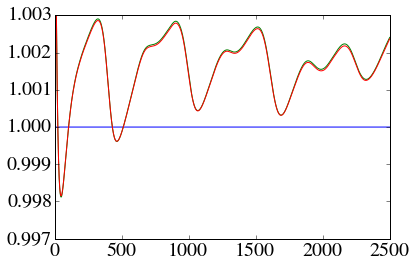

In [9]:
#PlotModels = ['Standard', 'NoInt1', 'Int1', 'Int2', 'Int3']
#PlotModels = ['NoInt1', 'Int1', 'Int2', 'Int3']
PlotModels = ['Standard','NoInt1','NoInt2']
RefModel = 'Standard'

for M in PlotModels:
    exec('cosmo = '+M)
    exec('ref = '+RefModel)
    cl = cosmo.raw_cl()
    clref = ref.raw_cl()
    l = cl['ell'][2:]
    plt.plot(l,cl['tt'][2:]/clref['tt'][2:])
plt.ylim([0.997,1.003])


(0.997, 1.003)

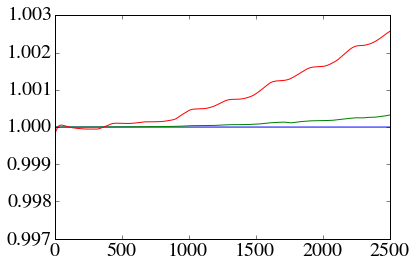

In [25]:
#PlotModels = ['Standard', 'NoInt1', 'Int1', 'Int2', 'Int3']
#PlotModels = ['NoInt1', 'Int1', 'Int2', 'Int3']
PlotModels = ['NoInt1','Int1','Int2']
RefModel = 'NoInt1'

for M in PlotModels:
    exec('cosmo = '+M)
    exec('ref = '+RefModel)
    cl = cosmo.raw_cl()
    clref = ref.raw_cl()
    l = cl['ell'][2:]
    plt.plot(l,cl['tt'][2:]/clref['tt'][2:])
plt.ylim([0.997,1.003])

In [ ]:
PlotModels = ['Standard', 'NoInt1', 'NoInt2', 'Int1', 'Int2', 'Int3']
refmodel = 

for M in PlotModels:
    exec('cosmo = '+M)
    cl = cosmo.raw_cl()
    l = cl['ell']
    plt.plot(l,l*(l+1)/(2.*np.pi)*cl['tt'])

In [ ]:
clStandard = Standard.raw_cl()
clNoInt1 = NoInt1.raw_cl()
clNoInt2 = NoInt2.raw_cl()
l = clStandard['ell']

plt.plot(l,l*(l+1)/(2.*np.pi)*clStandard['tt'],l,l*(l+1)/(2.*np.pi)*clNoInt1['tt'],l,l*(l+1)/(2.*np.pi)*clNoInt2['tt'])

plt.xlim([2,2500])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")

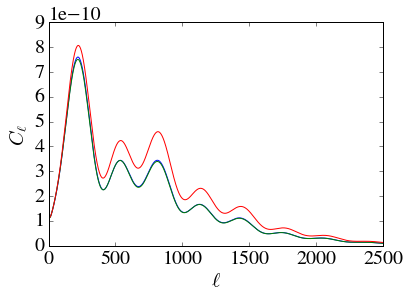

In [8]:
clStandard = Standard.raw_cl()
clNoInt1 = NoInt1.raw_cl()
clInt2 = Int2.raw_cl()
#clNoInt2 = NoInt2.raw_cl()
l = clStandard['ell']

plt.plot(l,l*(l+1)/(2.*np.pi)*clNoInt1['tt'],l,l*(l+1)/(2.*np.pi)*clStandard['tt'],l,l*(l+1)/(2.*np.pi)*clInt2['tt'])

plt.xlim([2,2500])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")

In [ ]:
clInt1 = Int1.raw_cl()
clInt2 = Int2.raw_cl()
clInt3 = Int3.raw_cl()
clInt4 = Int4.raw_cl()
l = clInt1['ell']

plt.plot(l,l*(l+1)/(2.*np.pi)*clInt1['tt'],l,l*(l+1)/(2.*np.pi)*clInt2['tt'],l,l*(l+1)/(2.*np.pi)*clInt3['tt'],l,l*(l+1)/(2.*np.pi)*clInt3['tt'],l,l*(l+1)/(2.*np.pi)*clInt4['tt'])

plt.xlim([2,2500])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")

In [ ]:
NoInt1.get_background();